In [39]:
import os, sys, argparse, importlib, time, inspect
import numpy as np
import matplotlib.pyplot as plt
import os.path as osp
if hasattr(__builtins__,'__IPYTHON__'):
    print('Notebook')
    from tqdm.notebook import tqdm
else:
    print('Not notebook')
    from tqdm import tqdm
from tensorflow.keras import backend as K
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' 
import tensorflow as tf
import tensorflow_probability as tfp

gpu_devices = tf.config.list_physical_devices('GPU') 
if len(gpu_devices) > 0:
    print("GPU detected")
    for i in range(len(gpu_devices)):
        tf.config.experimental.set_memory_growth(gpu_devices[i], True)
else:
    print('No GPU detected')

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.models import load_model, Model
import spektral
from sklearn.preprocessing import normalize
from spektral.data import DisjointLoader, BatchLoader, SingleLoader
from importlib import reload

import datetime as dt
os.chdir("../from_config") ######!!!!!!
import dev.testtraindata as dl
graph_data=dl.graph_data

Notebook
GPU detected


In [40]:
os.chdir('../model_eval')
os.getcwd()

'C:\\Users\\chris\\Christian\\3YR-UNI\\Bachelor\\IceCube\\model_eval'

In [36]:
def get_sets():
        print('Reading sets')
        sets = pd.read_pickle('../db_files/MuonGun/sets.pkl')
#         train_events = sets['train']
#         test_events = sets['test']
        return sets
sets=get_sets()

Reading sets


In [38]:
sets.keys()

dict_keys(['train', 'val', 'test'])

In [3]:
# with tf.device('/cpu:0'):
#     save_options = tf.saved_model.SaveOptions(experimental_io_device='/job:localhost')
#     model=tf.keras.models.load_model("trained_models/IceCube_neutrino/KHop_K[1,2]agmaxn_25_2htf2yxw", options=save_options)
# model.compile()
# batch_size=512
# # dataset=graph_data(test_steps=10, n_neighbors=25, restart=False, \
# #                                      transform_path='../db_files/dev_lvl7//transformers.pkl')
# # loader = DisjointLoader(dataset, batch_size=batch_size, epochs=1)

In [4]:
with tf.device('/cpu:0'):
    save_options = tf.saved_model.SaveOptions(experimental_io_device='/job:localhost')
    model=tf.keras.models.load_model("../trained_models/KHop_base_max_3fsagz9i", options=save_options)
model.compile()
batch_size=512
# dataset=graph_data(test_steps=10, n_neighbors=25, restart=False, \
#                                      transform_path='../db_files/dev_lvl7//transformers.pkl')
# loader = DisjointLoader(dataset, batch_size=batch_size, epochs=1)

In [5]:
# os.chdir('..')
# os.getcwd()
# dataset=graph_data(n_steps=10, n_neighbors=30, restart=False, traintest='test', i_test=0)
# loader = DisjointLoader(dataset, batch_size=batch_size, epochs=1)
# os.chdir('model_eval')
# os.getcwd()

In [6]:
# os.chdir('..')
# recos=[]
# trues=[]
# batch_size=512
# for i in range(10):
#     dataset=graph_data(n_steps=10, n_neighbors=31, restart=False, traintest='test', i_test=i)
#     loader = DisjointLoader(dataset, batch_size=batch_size, epochs=1)
#     reco, true=predict(loader)
#     recos.append(reco)
#     trues.append(true)
# os.chdir('model_eval')

In [8]:
# @tf.function(input_signature = loader.tf_signature(), experimental_relax_shapes = True)
# def test_step(inputs, targets):
#     predictions = model(inputs, training = False)
#     targets     = tf.cast(targets, tf.float32) 

#     return predictions, targets

In [9]:
# def predict(loader):
#     prediction_list, target_list = [], []
#     for batch in tqdm(loader, total=loader.steps_per_epoch):
#         inputs, targets = batch
#         predictions, targets = test_step(inputs, targets)

#         prediction_list.append(predictions.numpy())
#         target_list.append(targets.numpy())
#         y_reco  = tf.concat(prediction_list, axis = 0).numpy()
#         y_true  = tf.concat(target_list, axis = 0)
#         y_true  = tf.cast(y_true, tf.float32).numpy()
#     return y_reco, y_true

In [10]:
# os.chdir('..')
# ys=[]
# for i in range(2):
#     graphs=graph_data(n_steps=10, n_neighbors=31, restart=False, traintest='test', i_test=i)
#     for graph in tqdm(graphs, total=len(graphs)):
#         ys.append(graph.y)
# os.chdir('model_eval')   
# ysx=np.concatenate(ys)
# ysx=ysx.reshape(-1, 4)
# ysx=np.concatenate(ys)
# ysx=ysx.reshape(-1, 4)

In [11]:
# predckj=np.concatenate(recos)
# trueckj=np.concatenate(trues)
predckj=0
trueckj=0
dataset=0

In [12]:
import pandas as pd
predl=['energy_log10_pred', 'zenith_pred', 'azimuth_pred', 'zenith_kappa', 'azimuth_kappa']
truel=['energy_log10', 'zenith', 'azimuth', 'event_no']
# dfckj=pd.DataFrame(np.hstack([trueckj,predckj]), columns=truel+predl)


In [13]:
# plt.hist(dfckj['energy_log10_pred'], bins=100);

In [14]:
# np.percentile(180/np.pi*abs(dfckj['azimuth_pred']-dfckj['azimuth']), 50)

In [15]:
# dfckj.to_csv('../predictions/ckj_2dvM.csv')

In [16]:
# from scipy.special import iv
# ze_sigma = np.sqrt(1 - iv(1,np.square(reco[:,3]))/iv(0,np.square(reco[:,3])))*180/np.pi
# az_sigma = np.sqrt(1 - iv(1,np.square(reco[:,4]))/iv(0,np.square(reco[:,4]))*180/np.pi
# zenimask=reco[:,3]>np.median(reco[:,3])
# azimask=reco[:,4]>np.median(reco[:,4])
# zenireco, zenitrue=reco[zenimask], true[zenimask]
# azireco, azitrue=reco[azimask], true[azimask]
# mask=np.logical_and(zenimask, azimask) 
# reco1, true1=reco[mask], true[mask]

In [17]:
dfjv=pd.read_csv('../predictions/OscNext_ZeE_m21_2jj9_test_predictions.csv')
dfckj=pd.read_csv('../predictions/ckj_2dvM.csv')
dfjs=pd.read_csv('../predictions/jakob_predictions_3105.csv')
dfjbs=pd.read_csv('../predictions/GraphSageFullOscNext.csv')
# dfjbs=pd.read_csv('../predictions/GraphSageFullOscNext_3D.csv')
dfjbs['zenith']=np.pi-dfjbs['zenith']
dfjbs['zenith_pred']=np.pi-dfjbs['zenith_pred']

In [18]:
dfjs=dfjs.drop(0)
dfckj=dfckj.sort_values(by='event_no')
dfjv=dfjv.sort_values(by='event_no')
dfjs=dfjs.sort_values(by='event_no')
dfjbs=dfjbs.sort_values(by='event_no')

In [19]:
dfjs['energy_log10_pred']=dfjs['energy_log10']

In [20]:
dfjs['zenith']=dfckj['zenith'].to_numpy()
dfjs['energy_log10']=dfckj['energy_log10'].to_numpy()

In [46]:
mask=dfckj['event_no'].to_numpy()==dfjbs['event_no'].to_numpy()

In [51]:
dfs=[dfjv[mask], dfckj[mask], dfjs[mask], dfjbs[mask]]
names=['Jonas', 'Christian', 'Schauser', 'Johann']

In [52]:
for df in dfs:
#     df=df[mask]
    for target in truel[:3]:
        if target+'_pred' in df.columns:
            df[target+'_res']=df[target]-df[target+'_pred']

<ipython-input-52-fd472cdb7a68>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[target+'_res']=df[target]-df[target+'_pred']


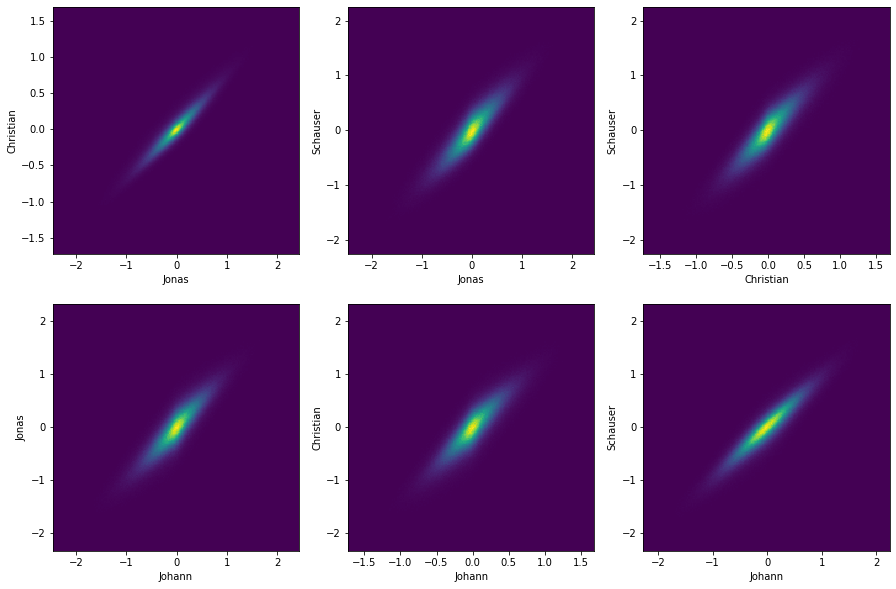

In [55]:
bins=200
fig, ax =plt.subplots(nrows=2, ncols=3, figsize=(15,10))
ax[0][0].hist2d(dfs[0]['zenith_res'], dfs[1]['zenith_res'], bins=bins)
ax[0][1].hist2d(dfs[0]['zenith_res'], dfs[2]['zenith_res'], bins=bins);
ax[0][2].hist2d(dfs[1]['zenith_res'], dfs[2]['zenith_res'], bins=bins);
ax[1][0].hist2d(dfs[0]['zenith_res'], dfs[3]['zenith_res'], bins=bins)
ax[1][1].hist2d(dfs[1]['zenith_res'], dfs[3]['zenith_res'], bins=bins);
ax[1][2].hist2d(dfs[2]['zenith_res'], dfs[3]['zenith_res'], bins=bins);
ax[0][0].set(xlabel='Jonas', ylabel='Christian')
ax[0][1].set(xlabel='Jonas', ylabel='Schauser')
ax[0][2].set(xlabel='Christian', ylabel='Schauser')
ax[1][0].set(xlabel='Johann', ylabel='Jonas')
ax[1][1].set(xlabel='Johann', ylabel='Christian')
ax[1][2].set(xlabel='Johann', ylabel='Schauser');

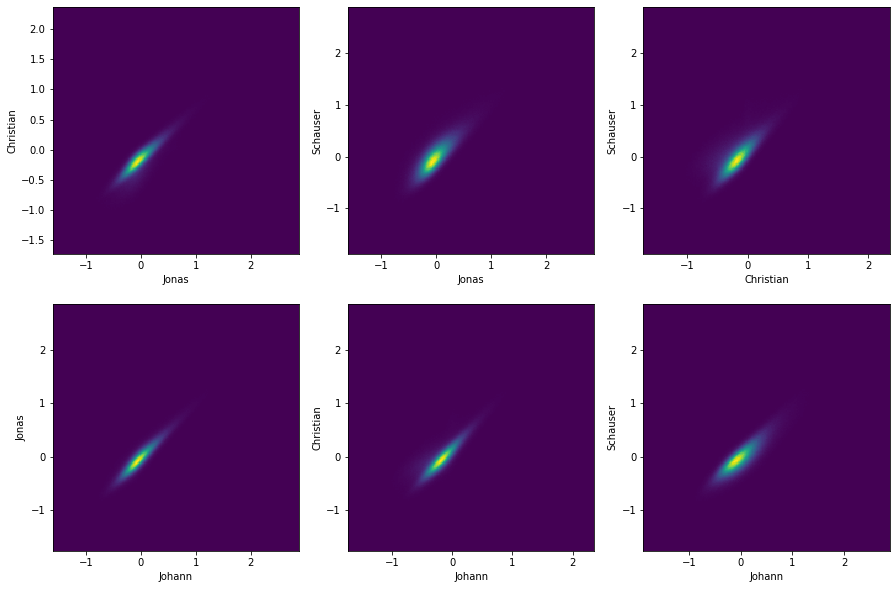

In [56]:
fig, ax =plt.subplots(nrows=2, ncols=3, figsize=(15,10))
ax[0][0].hist2d(dfs[0]['energy_log10_res'], dfs[1]['energy_log10_res'], bins=bins)
ax[0][1].hist2d(dfs[0]['energy_log10_res'], dfs[2]['energy_log10_res'], bins=bins);
ax[0][2].hist2d(dfs[1]['energy_log10_res'], dfs[2]['energy_log10_res'], bins=bins);
ax[1][0].hist2d(dfs[0]['energy_log10_res'], dfs[3]['energy_log10_res'], bins=bins)
ax[1][1].hist2d(dfs[1]['energy_log10_res'], dfs[3]['energy_log10_res'], bins=bins);
ax[1][2].hist2d(dfs[2]['energy_log10_res'], dfs[3]['energy_log10_res'], bins=bins);
ax[0][0].set(xlabel='Jonas', ylabel='Christian')
ax[0][1].set(xlabel='Jonas', ylabel='Schauser')
ax[0][2].set(xlabel='Christian', ylabel='Schauser')
ax[1][0].set(xlabel='Johann', ylabel='Jonas')
ax[1][1].set(xlabel='Johann', ylabel='Christian')
ax[1][2].set(xlabel='Johann', ylabel='Schauser');

In [61]:
import sqlite3, os, sys, pickle
import pandas as pd
import tensorflow as tf
import numpy as np
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
transform_path='../db_files/dev_lvl7/transformers.pkl'
db_path= '../db_files/dev_lvl7/dev_lvl7_mu_nu_e_classification_v003.db'
conn = sqlite3.connect(db_path)
def get_event_no():
        print('Reading sets')
        sets = pd.read_pickle('../db_files/dev_lvl7/sets.pkl')
        train_events = sets['train']
        test_events = sets['test']
        return train_events['event_no'].to_numpy(), test_events['event_no'].to_numpy()
_, test_events=get_event_no()
df_truth=pd.read_sql(f"select * from truth where event_no in {tuple(test_events)}", conn)
cols=df_truth.columns

Reading sets


In [62]:
transformers = pickle.load(open(transform_path, 'rb'))
trans_y      = transformers['truth']

for col in truel[:3]:
    df_truth[col] = trans_y[col].inverse_transform(np.array(df_truth[col]).reshape(1, -1)).T

In [63]:
df_truth=df_truth.sort_values(by='event_no')
for col in cols:
    if 'position' in col:
        df_truth.drop(col, axis=1, inplace=True)
df_truth[mask]

,event_no,energy_log10,azimuth,zenith,pid,event_time,sim_type,azimuth_retro,time_retro,energy_log10_retro,zenith_retro,azimuth_sigma,time_sigma,zenith_sigma,energy_log10_sigma,osc_weight,interaction_type,elasticity,lvl7_probnu,lvl4_probnu
758122,8,0.502466,3.792724,1.480126,-14,1.087909e+17,genie,4.443801,3.991215,0.763734,1.622113,0.396783,34.441406,0.333950,2.176493,8.048285e-07,1,-0.209022,0.250243,0.319580
758123,10,0.614953,5.647645,2.365463,14,1.087909e+17,genie,2.017375,3.989426,0.965347,0.925667,0.312475,37.034180,0.234389,0.976629,2.249167e-07,1,-0.653041,0.275743,0.453825
758124,15,0.537057,1.259284,1.690406,14,1.087909e+17,genie,0.894761,3.993693,0.643009,1.887412,0.332755,37.824219,0.103806,1.587005,3.752565e-08,1,-0.115829,0.238741,0.332233
758125,29,0.308843,0.199578,2.857227,-14,1.087909e+17,genie,3.470169,3.993132,0.212989,1.607185,0.823936,30.969727,0.289428,1.336768,4.494020e-07,1,1.027427,0.074667,0.470918
758126,32,0.617130,4.078112,1.935199,14,1.087909e+17,genie,3.458543,3.992504,0.925001,1.743543,0.768962,16.234375,0.112817,0.781923,5.318767e-07,1,-0.453342,0.137343,0.431267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1237435,117104650,2.397875,4.840583,1.130206,13,1.087909e+17,muongun,4.248538,3.979969,1.655061,0.922752,0.554012,61.435547,0.220469,6.572929,9.497813e-05,-1,-2.781719,-2.172871,-1.445220
1237437,117104660,2.295405,3.755089,1.254175,13,1.087909e+17,muongun,0.214110,3.989122,1.886222,0.906164,0.240934,45.567383,0.161811,7.832520,9.281423e-05,-1,-2.781719,-2.120801,-2.832467
1237440,117104670,2.374606,4.678488,0.880132,13,1.087909e+17,muongun,4.718332,4.007497,1.228974,0.907498,0.251718,27.561523,0.199687,2.505673,1.207102e-04,-1,-2.781719,-1.016579,-0.076259
1237446,117104696,2.430512,4.927573,0.971499,13,1.087909e+17,muongun,3.203603,4.037598,1.003109,1.822341,0.598274,69.016602,0.654931,1.882091,1.115377e-04,-1,-2.781719,-0.671130,-0.384599


C:\Users\chris\anaconda3\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


ValueError: Can only compare identically-labeled Series objects

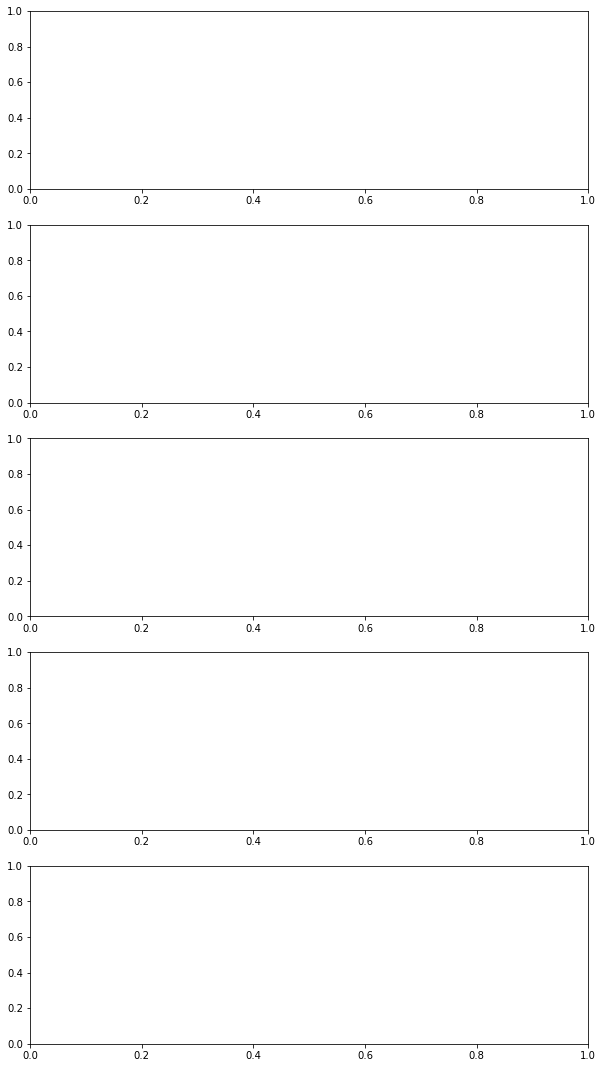

In [60]:
fig, ax =plt.subplots(nrows=5, figsize=(10,19))
for i in range(5):
    if i!=4:
        ax[i].hist2d(df_truth['energy_log10'], dfs[i]['energy_log10_pred'], bins=100)
        ax[i].set(xlabel='True', ylabel=names[i])
    if i==4:
        ax[i].hist2d(df_truth['energy_log10'], df_truth['energy_log10_retro'], bins=100)
        ax[i].set(xlabel='True')

In [ ]:
fig, ax =plt.subplots(nrows=5, figsize=(10,15))
for i in range(5):
    if i!=4:
        ax[i].hist2d(df_truth['zenith'], dfs[i]['zenith_pred'], bins=100)
        ax[i].set(ylabel=names[i])
    if i==4:
        ax[i].hist2d(df_truth['zenith'], df_truth['zenith_retro'], bins=100)
        ax[i].set(xlabel='True', ylabel='Reco')

In [ ]:
fig, ax =plt.subplots(nrows=4, figsize=(10,15))
for i in range(4):
    ax[i].hist2d(df_truth['energy_log10_retro'], dfs[i]['energy_log10_pred'], bins=100)
    ax[i].set(ylabel=names[i])

In [ ]:
fig, ax =plt.subplots(nrows=2, ncols=2, figsize=(15,15))
ax=ax.flatten()
for i in range(4):
    ax[i].hist2d(df_truth['zenith_retro'], dfs[i]['zenith_pred'], bins=100)
    ax[i].set(xlabel='retro', ylabel=names[i])

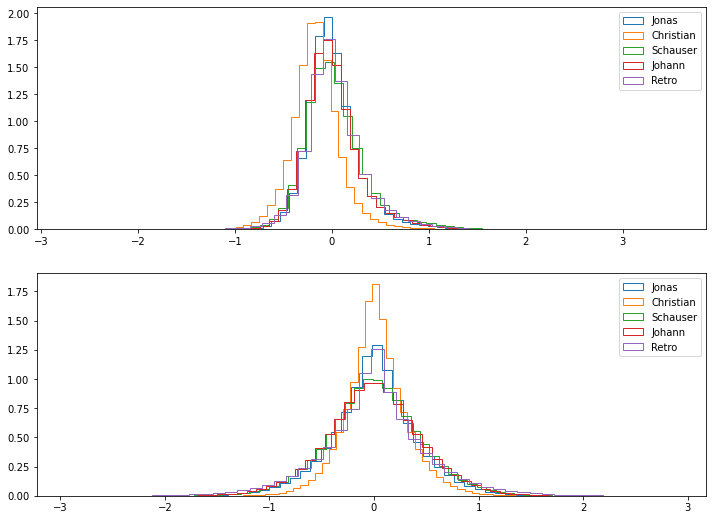

In [294]:
fig, ax=plt.subplots(2, figsize=(12,9))
bins=50
dens=1
for i in range(4):
    ax[0].hist(dfs[i]['energy_log10_res'], bins=bins, histtype='step',  density=dens, label=names[i])
    ax[1].hist(dfs[i]['zenith_res'], bins=bins, histtype='step',  density=dens, label=names[i])
    
ax[0].hist(df_truth['energy_log10']-df_truth['energy_log10_retro'], bins=bins, histtype='step',  density=dens, label='Retro')
ax[1].hist(df_truth['zenith']-df_truth['zenith_retro'], bins=bins, histtype='step',  density=dens, label='Retro')

ax[0].legend()
ax[1].legend()

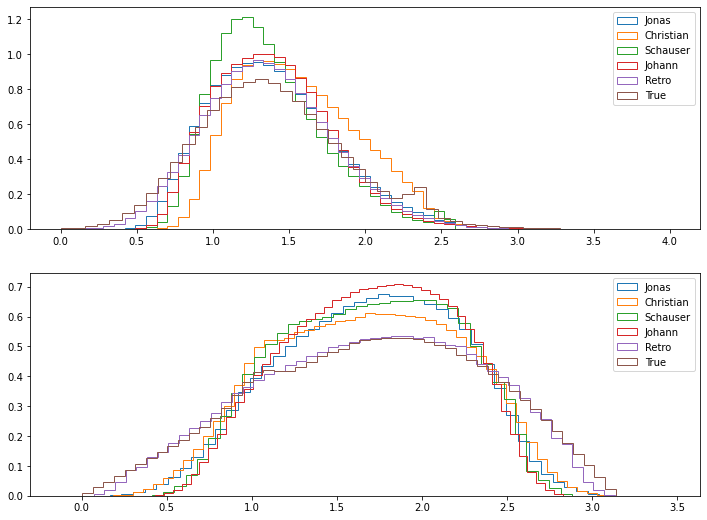

In [279]:
fig, ax=plt.subplots(2, figsize=(12,9))
bins=50
dens=1
for i in range(4):
    ax[0].hist(dfs[i]['energy_log10_pred'], bins=bins, range=(0,3.5), histtype='step',  density=dens, label=names[i])
    ax[1].hist(dfs[i]['zenith_pred'], bins=bins, histtype='step',  density=dens, label=names[i])
ax[0].hist(df_truth['energy_log10_retro'], bins=bins, range=(0,3.5), histtype='step',  density=dens, label='Retro')
ax[1].hist(df_truth['zenith_retro'], bins=bins,  histtype='step',  density=dens, label='Retro')
ax[0].hist(dfckj['energy_log10'], bins=bins, histtype='step',  density=dens, label='True')
ax[1].hist(dfckj['zenith'], bins=bins, histtype='step',  density=dens, label='True')
ax[0].legend()
ax[1].legend()

<ipython-input-63-b1b6b8585570>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfckj[(dfckj['zenith_res']>0.2)& (dfckj['zenith']>2.7)]['zenith_pred']+=0.1


In [78]:
zenipred1=dfckj.where((dfckj['zenith_res']<0.2)& (dfckj['zenith']<2.7), dfckj['zenith_pred']-0.1, axis=0)
dfckj['zenith_pred']=zenipred1['zenith_pred']

{'Old metrics:': ' ', 'E': 0.207, 'Omega': '46.582', 'Zeni': '15.226', 'Azi': '51.520'} {'E': '0.201, 0.063<->0.402', 'Omega': '30.851, 11.096<->70.808', 'Zeni': '9.552, 2.530<->23.400', 'Azi': '29.273, 6.873<->89.539'}


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


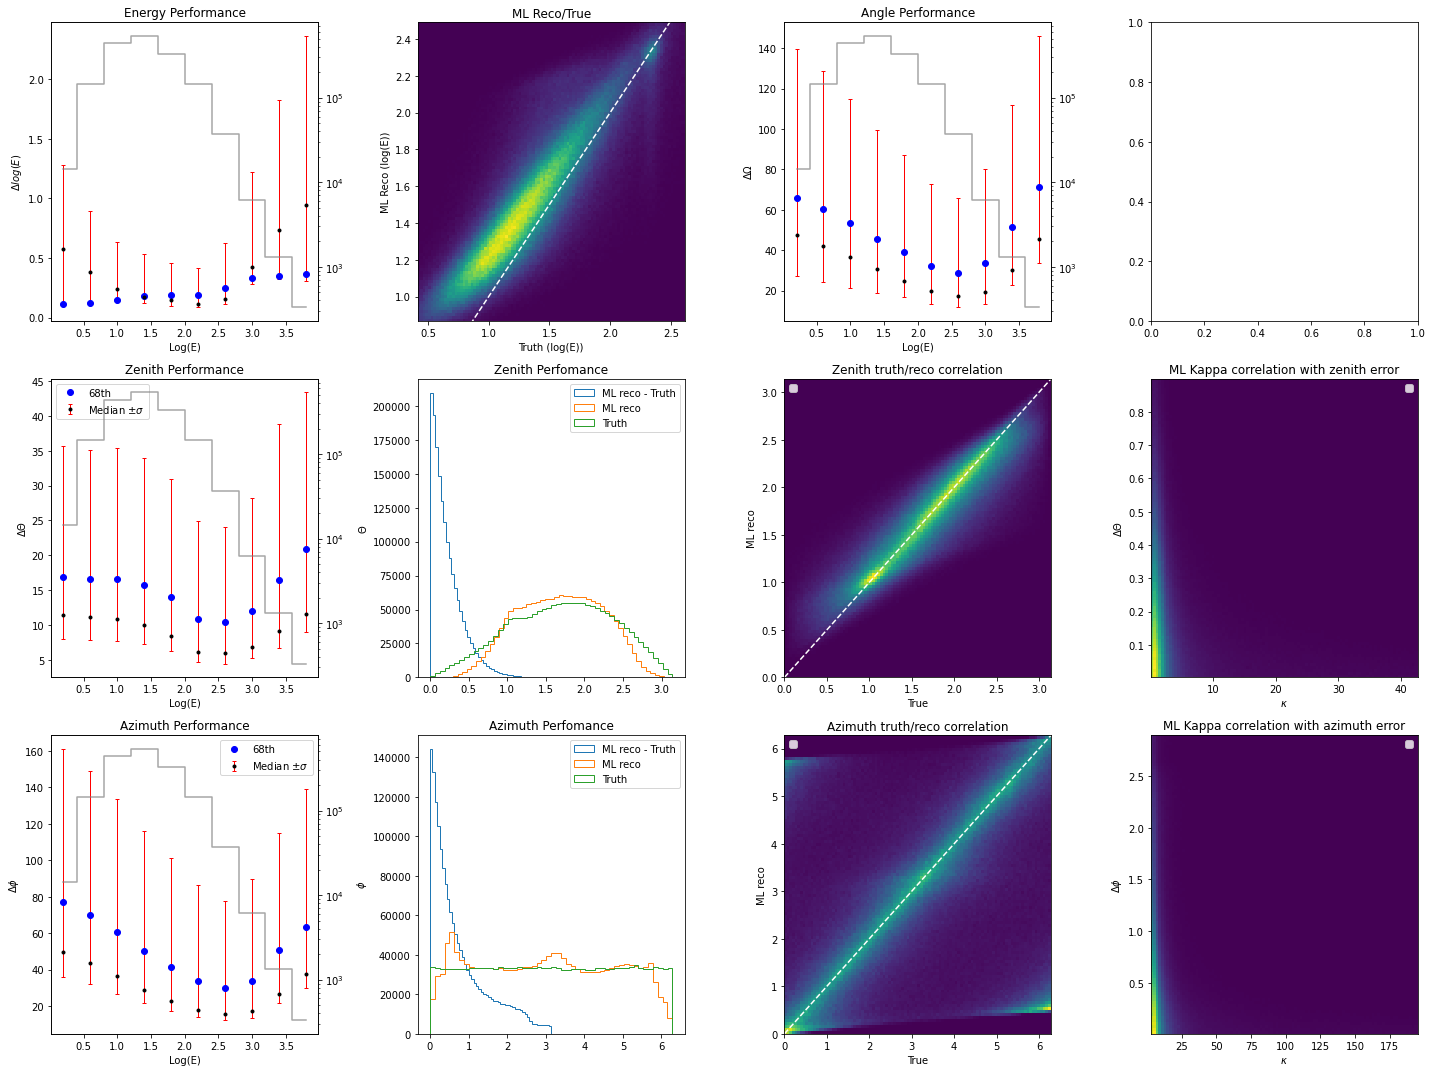

In [86]:
# os.chdir('../model_eval')
# os.getcwd()
import eval_plots as e
reload(e)
performance=e.performance_vM2D
# performance(reco1, true1);
performance(dfckj[predl].to_numpy(), dfckj[truel[:3]].to_numpy());

In [27]:
import pandas as pd
def get_event_no():
        print('Reading sets')
        sets = pd.read_pickle('../db_files/dev_lvl7/sets.pkl')
        train_events = sets['train']
        test_events = sets['test']
        return train_events['event_no'].to_numpy(), test_events['event_no'].to_numpy()

In [28]:
train_events, test_events=get_event_no()

Reading sets


In [31]:
ids=true[:,3]

In [32]:
np.in1d(ids, test_events)

100000